In [1]:
import nltk
import re
import os.path
nltk.download('punkt')
import wordcloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swagat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def removeContractions(text):
    text = re.sub('[cC]an\'t','can not',text)
    text = re.sub('[wW]on\'t','will not',text)
    text = re.sub('n\'t',' not',text)
    text = re.sub('\'ll',' will',text)
    text = re.sub('\'ve',' have',text)
    text = re.sub('\'re','are',text)
    text = re.sub('\'m',' am',text)
    
    #remove 's if preceded by singular pronouns he,she,here,there,it,that
    #The order of replacement should not be changed because there has an inherent here and she has inherent he
    text = re.sub("(?<=[Ii]t)'s", ' is',text,re.I)    
    text = re.sub("(?<=[tT]here)'s", ' is',text)
    text = re.sub("(?<=[tT]hat)'s", ' is',text)
    text = re.sub("(?<=[sS]he)'s", ' is',text)
    text = re.sub("(?<=[hH]ere)'s", ' is',text)
    text = re.sub("(?<=[hH]e)'s", ' is',text)
    return text

In [3]:
#Function to add the word if not already present or increase the count if present.
#accepts the word and reference to the dict object to store the word types and respective counts
def addToVocab(word,vocab):
    if word in vocab.keys():
        vocab[word]+=1
    else:
        vocab[word] = 1
    return 

#Function to count the words types and their respective counts.
#Accepts the string in which words need to be counted and the reference to dict object to store them.
#Separates punctuations or non-alphanumeric character only if they appear in begining or end of the word.
def countWordTypes(text,vocabDict):
    #import pdb; pdb.set_trace()
    if (text == '' or text=='\n'):
        return
    for word in re.split('\s+',text):
        if (word == '' or word == '\n'):
            continue
            
        if re.search('\W',word):
            word_puncts = re.split('[a-zA-Z0-9]',word) #used this to capture the underscore.regex \w counts _ as alpha-numeric
            
            #Look for only first and last element of the array as those are the only 
            #punctuations we need to be concerned with because rest all occur between letters or numerals
            #checking for null because if there is no punctuation the above split will insert an empty element
            #re.split('[a-zA-Z0-9]',"3.16") ----> ['', '.', '', '']
            if not word_puncts[0] == '':
                for i in range(0,len(word_puncts[0])):
                    addToVocab(word_puncts[0][i],vocabDict)
            if not word_puncts[len(word_puncts)-1] == '':
                for i in range(0,len(word_puncts[len(word_puncts)-1])):
                    addToVocab(word_puncts[len(word_puncts)-1][i],vocabDict)
            #Add the remaining word to dict
            addToVocab(word[len(word_puncts[0]):(len(word)-len(word_puncts[len(word_puncts)-1]))],vocabDict)
        else:
            #add the word to the vocab
            addToVocab(word,vocabDict)
            
    

In [8]:
filename = "sampleInput.txt" #write code to get filename from command line
os.remove("output.txt")
oFile = open("output.txt",'a')
wordFreqDict = {}

if os.path.isfile(filename):
    if os.path.getsize(filename) == 0:
        print("File %s is empty" %(filename))
  
    with open(filename) as fp:
        paraCount = 1
        newPara = False
        sent_count = 0
        
        for line in fp:
            #Count the paragraphs
            if line.isspace() or re.match("^[ \t]",line):
                paraCount+=1
                newPara = True
            else:
                newPara =False
        
            #counting sentences
            sent_count += len(nltk.sent_tokenize(text=line))
            
            #counting the word types
            #First remove the contractions
            line = removeContractions(line)
            
            #now remove punctuations as required and count word types
            countWordTypes(line,wordFreqDict)
            
        print("Paragraph Count = %d\nSentence count = %d\nToken Count = %d\nWord Types = %d" %(paraCount,sent_count,sum(wordFreqDict.values()),len(wordFreqDict.keys())),file=oFile)
        f = sorted(sorted(wordFreqDict.items(), key=lambda x: x[0]), key=lambda x:x[1],reverse=True)
        for i in range(0,len(f)):
            print('%s %d' %(f[i][0],f[i][1]),file=oFile)
        
else:
    print("File %s doesn't exist" %(filename))

oFile.close()
fp.close()

In [9]:
import wordcloud
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

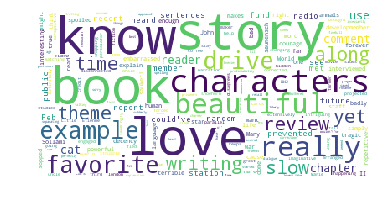

In [12]:
wc = wordcloud.WordCloud(background_color='white',
                          max_words=500,
                          max_font_size=60, 
                          random_state=42
                         ).generate((open("sampleInput.txt")).read())
fig = plt.figure(1)
plt.imshow(wc)
plt.axis('off')
plt.show()
fig.savefig("cloud.png")